In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filenames = [["30_GP_Matern.npz", "50_GP_Matern.npz", "60_GP_Matern.npz", "70_GP_Matern.npz", "80_GP_Matern.npz"],
             ["30_GP_Poly.npz", "50_GP_Poly.npz", "60_GP_Poly.npz", "70_GP_Poly.npz", "80_GP_Poly.npz"],
             ["30_NP.npz", "50_NP.npz", "60_NP.npz", "70_NP.npz", "80_NP.npz"],
             ["30_NP_ODE.npz", "50_NP_ODE.npz", "60_NP_ODE.npz", "70_NP_ODE.npz", "80_NP_ODE.npz"]]

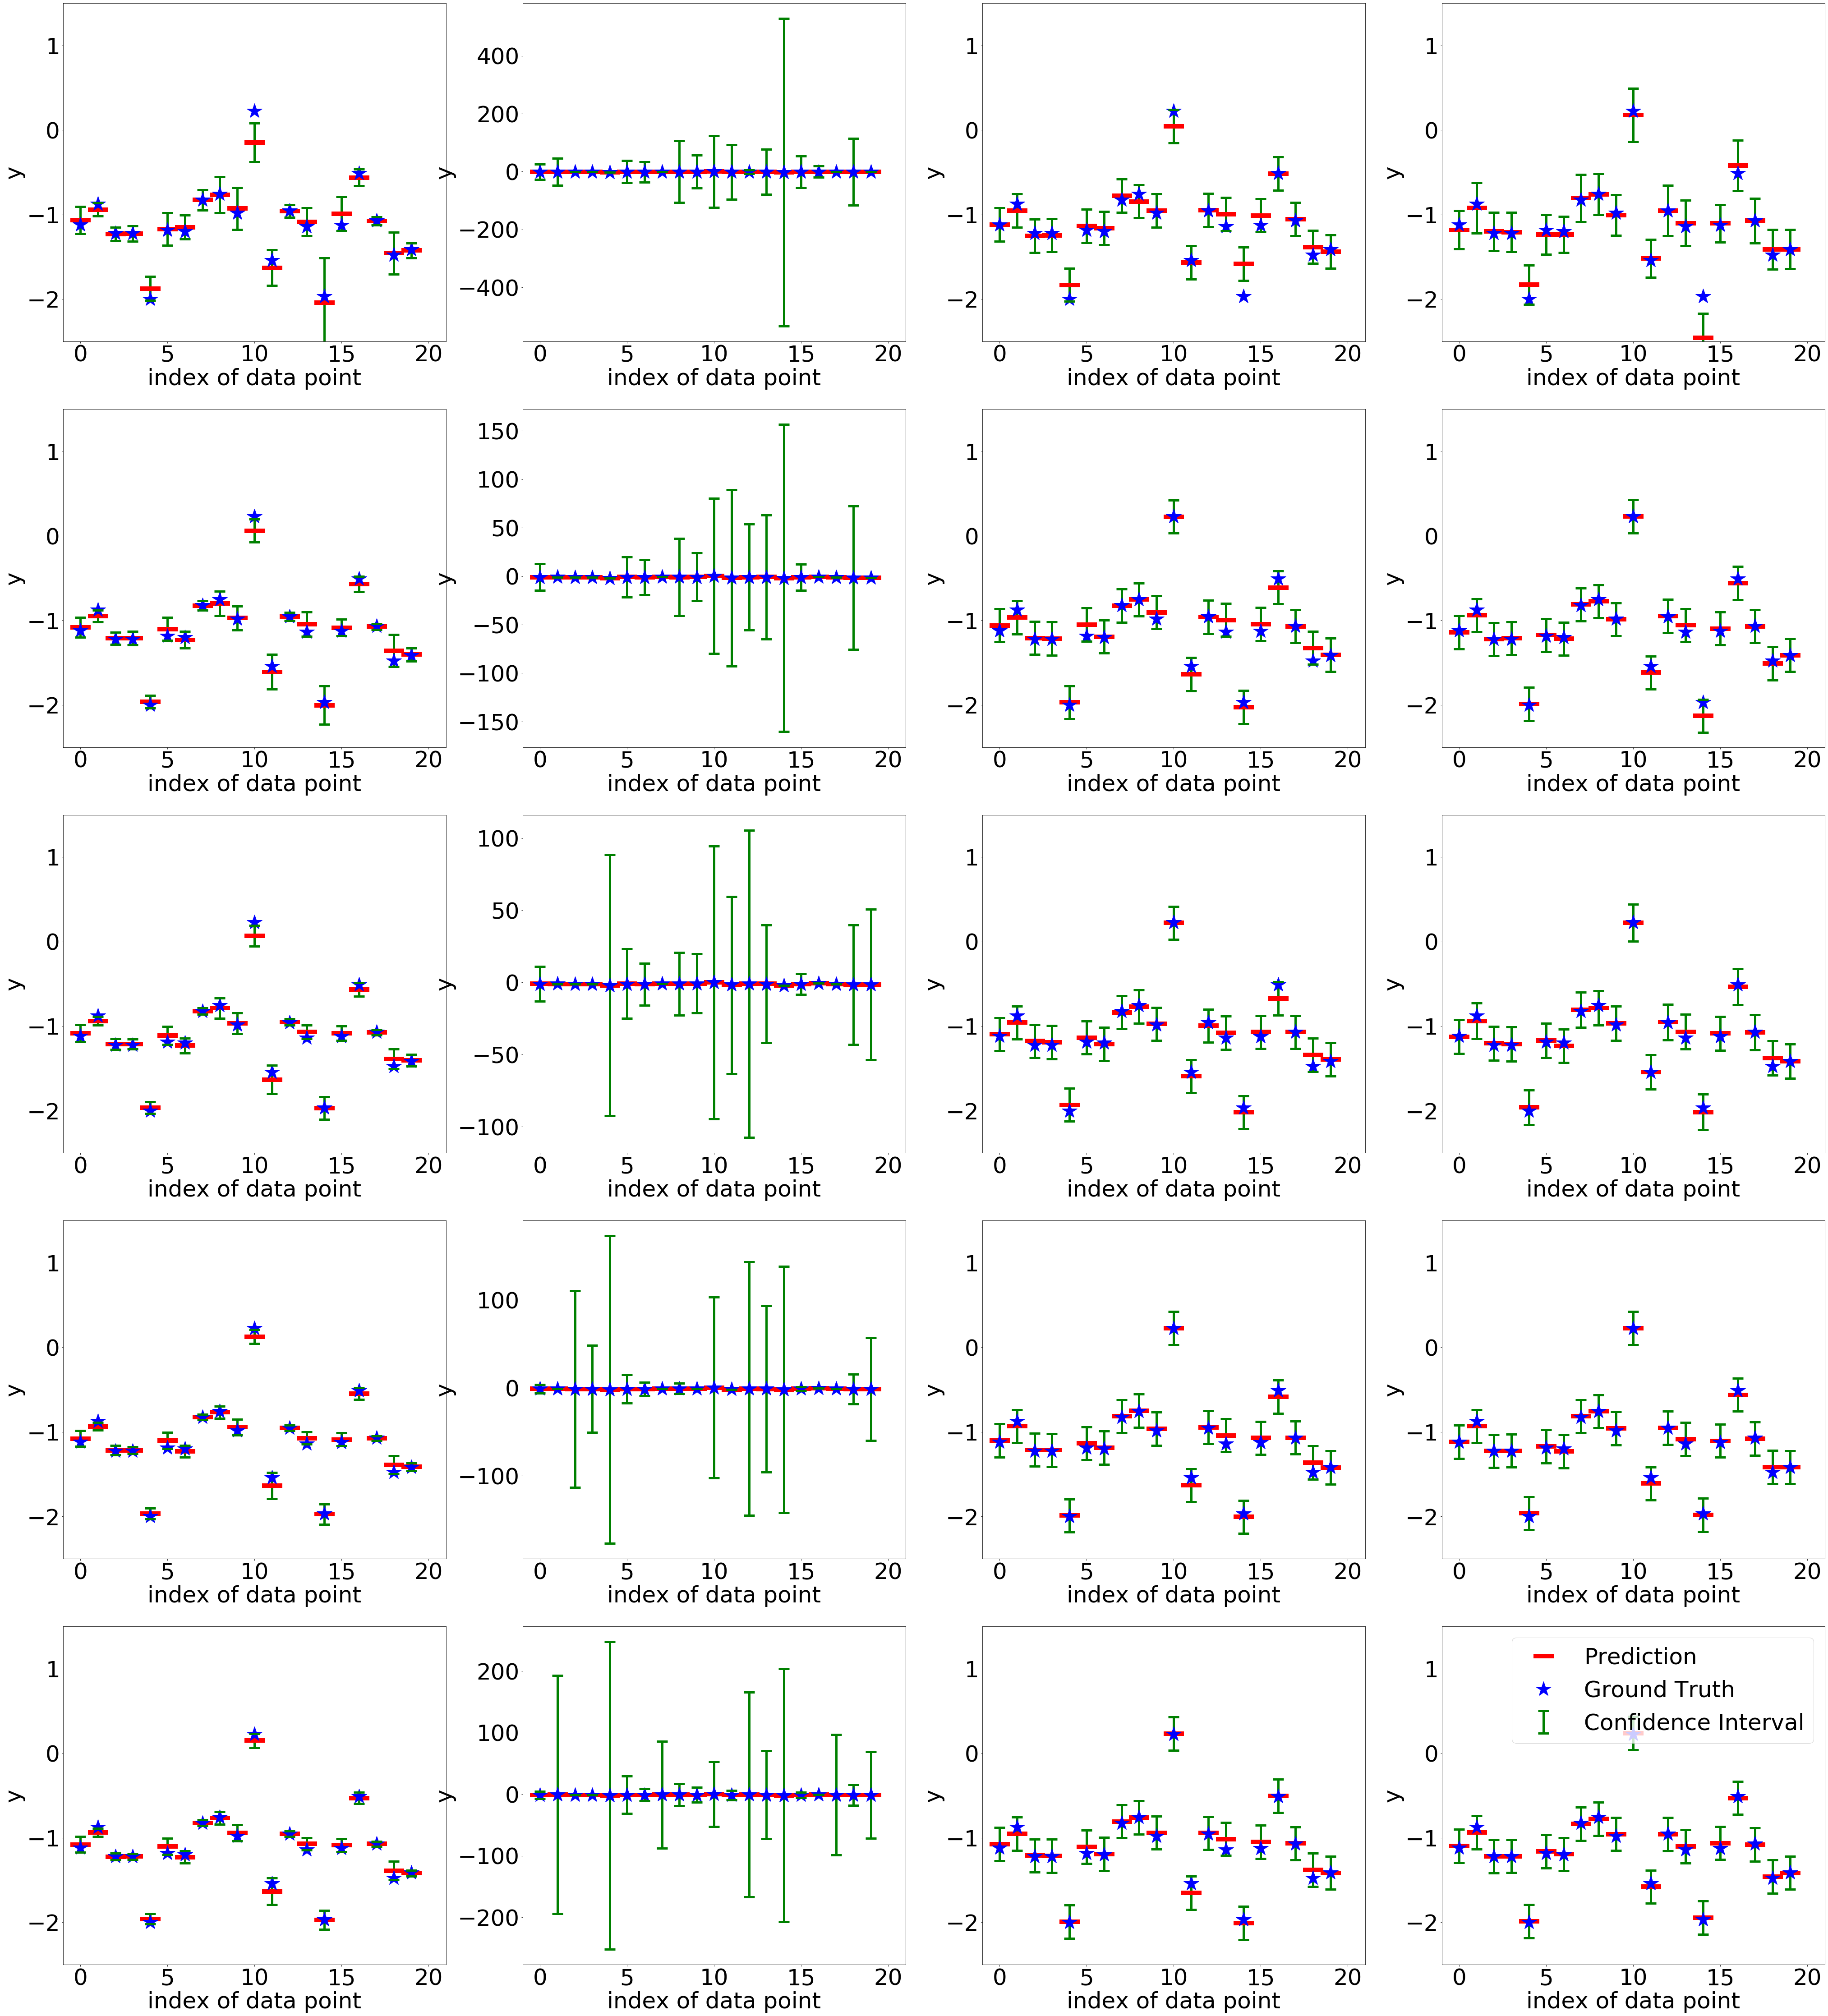

In [3]:
labelfont = 50
markerline = 45
markerstar = 35
matplotlib.rc('xtick', labelsize=labelfont) 
matplotlib.rc('ytick', labelsize=labelfont)
num_test = 20

fig, axs = plt.subplots(5, 4, figsize=(70,80))

for i in range(5):
    for j in range(4):
        
        data = np.load(filenames[j][i])
        pred = data['pred']
        target = data['target']
        std = data['std']
        
        axs[i][j].plot(pred, 'r_', markersize=markerline, mew=10, label='Prediction')
        axs[i][j].plot(target, 'b*', markersize=markerstar, label='Ground Truth')
        axs[i][j].errorbar(np.arange(num_test), pred, std*1.96, linestyle='None', capsize=12,
                     capthick=5, elinewidth=5, ecolor='g', label='Confidence Interval')
        
        axs[i][j].set_xlim(-1,21)
        axs[i][j].set_xlabel('index of data point',fontsize=labelfont)
        axs[i][j].set_ylabel('y',fontsize=labelfont)
        
        if j != 1:
            axs[i][j].set_ylim(-2.5,1.5)
        
# plt.ylabel('value of y',fontsize=labelfont)        
# plt.xlabel('index of data points',fontsize=labelfont)      
plt.legend(fontsize=labelfont, loc='upper right')
plt.savefig('UQ_Viz.png', bbox_inches='tight')  
   
        
